# Student Performance

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("../artifacts/raw.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

In [10]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [11]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [12]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average"] = round(df["total_score"]/3,2)
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [13]:
reading_full = df[df["reading_score"] == 100]["average"].count()
writing_full = df[df["writing_score"] == 100]["average"].count()
maths_full = df[df["math_score"] == 100]["average"].count()

In [14]:
print("reading_full",reading_full)
print("writing_full",writing_full)
print("maths_full",maths_full)

reading_full 17
writing_full 14
maths_full 7


In [15]:
reading_less20 = df[df["reading_score"] <=20]["average"].count()
writing_less20 = df[df["writing_score"] <=20]["average"].count()
maths_less20 = df[df["math_score"] <=20]["average"].count()

In [16]:
print("Reading less than 20 - ", reading_less20)
print("Writing less than 20 - ", writing_less20)
print("Maths less than 20 - ", maths_less20)

Reading less than 20 -  1
Writing less than 20 -  3
Maths less than 20 -  4


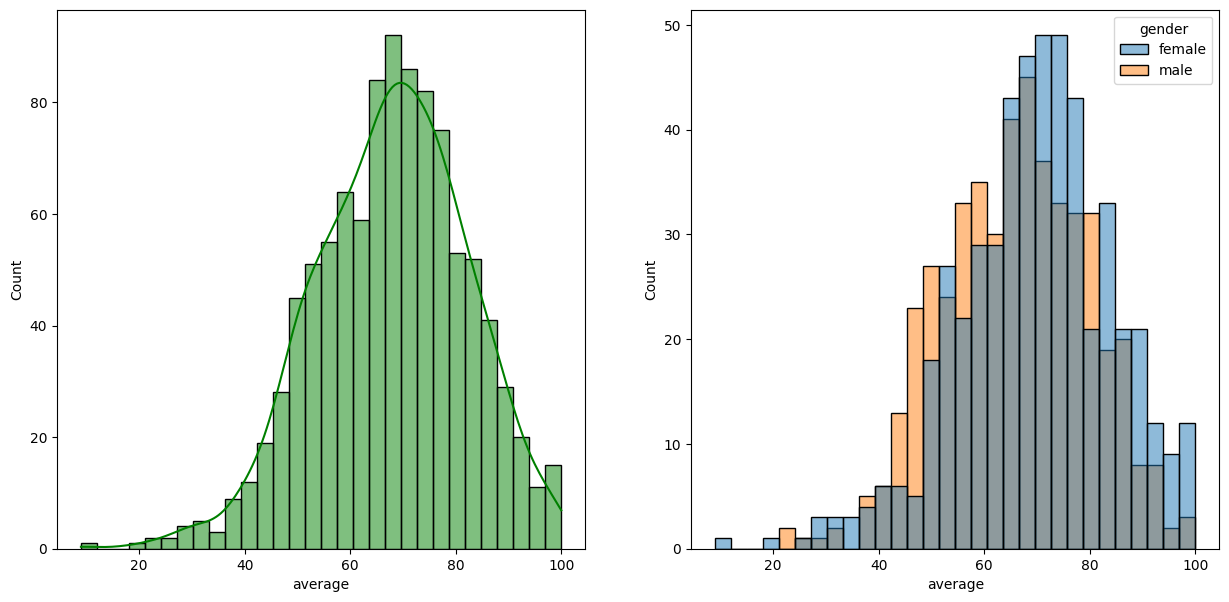

In [17]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x="average", bins=30, kde=True, color="g")
plt.subplot(122)
sns.histplot(data=df, x="average", bins=30, hue="gender")
plt.show()


Female student perform well than male student